### Optimisation des paramètres :
*Encore une fois, il existe plusieurs manières de calculer les paramètres optimaux d'une régression linéaire et il serait difficile de toutes les lister. Nous allons donc traiter ici de la technique la plus commune*

Le but de l'optimisation est de modifier les paramètres du modèle pour minimiser l'erreur. Nous allons pour cela utiliser l'outil gradient.

Pour rappel on appel le gradient d'une fonction à n variables est l'application qui associe à f un vecteur dont les composantes sont les dérivées partielles par rapport à chacune des variables de f :
<br><br>
$
\nabla f(\left.x_{1}, x_{2}, \ldots, x_{n}\right)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1} \\
\dfrac{\partial f}{\partial x_2} \\
\vdots \\
\dfrac{\partial f}{\partial x_n}
\end{array}\right]
$

<br>

Calculer le gradient de notre fonction coût va nous renseigner sur ses variations et fournira des des informations sur la manière dont on doit faire varier les paramètres pour minimiser l'erreur.


### Calcul du gradient :
Dans cette section, nous allons calculer ensemble le gradient de la fonction coût. Si vous êtes adepte des maths, et que vous voulez une démonstration pas à pas, je vous invite à aller voir la [vidéo de MachinLearnIA](https://www.youtube.com/watch?v=wg7-roETbbM) qui sert de base à ce chapitre.


Rappelons ce qui a été établi plus haut:
- Le modèle $ŷ_i = a \times x_i + b$
- La fonction coût $S(y,ŷ) = \frac{1}{2m} * \sum_{i=0}^m (ŷ_i - y_i)²$


Calculons les dérivées partielles de S par rapport aux paramètres a et b: <br>
$\frac{\partial S}{\partial a} = \sum_{i=0}^m x_i \times (ŷ_i - y_i)$ <br>
$\frac{\partial S}{\partial b} = \sum_{i=0}^m (ŷ_i - y_i)$

On peut remarquer qu'en posant :

$X = \left[\begin{array}{c}{x_1\\
\vdots\\x_m} {1 \\ \vdots \\ 1}\end{array} \right]$

$Y =  \left[\begin{array}{c}
{y_1\\ \vdots \\ y_m}\end{array}\right]$

$\Theta =  \left[\begin{array}{c}
{a \\ b}\end{array}\right]$

On a alors :
$∇S = \frac{1}{m} \times ^tX \times (X\Theta - Y)$




### Stratégie d'optimisation :
Pour optimiser le modèle, l'idée est de réaliser un certain nombre d'itérations au cours desquelles nous allons modifier légèrement les paramètres a et b. Pour cela, à chaque itération, on calcule la nouvelle valeur de $\Theta$ de la manière suivante :
$\Theta ' = \Theta - \alpha \times ∇S$

On pourrait avoir envie de retrancher simplement le gradient au vecteur $\Theta$ mais dans certains cas, si la variation de S est trop importante, on pourrait se retrouver dans l'impossibilité de converger :

-- Insérer animations explicatives sur gradient trop grand -- 

Pour résoudre ce problème, nous allons ajouter l'**hyperparamètre** $\alpha$ à notre modèle. On l'appelle le `learning rate` et c'est un simple coefficient qui permet de pondérer le gradient lors du calcul de $\Theta$ pour limiter la valeur du gradient. Nous ne traiterons pas plus de cet hyperparmamètre ici, cela sera traité dans le prochain chapitre.

## Synthèse des calculs :
- On a choisi un modèle de droite affine :  $ŷ_i= a x_i+ b$
- On a choisi d’utiliser la fonction coût MSE qui s’écrit donc : $S(y,ŷ) = \frac{1}{2m} * \sum_{i=0}^m (ŷ_i - y_i)²$

- On utilise l’algorithme de descente de gradient pour optimiser les paramètres avec cette formule : $\Theta ' = \Theta - \alpha \times ∇S$ 


Pour pouvoir calculer tout cela il nous faut définir 3 matrices : 
* X  : Une matrice qui contient les **données explicatives** (m données discrètes)
* Y  : Une matrice qui contient les** données expliquées** tirées du dataset (m données discrètes). Ces données serviront à calibrer le modèle
* $\Theta$ : La matrice qui contient les **paramètres du modèle**. Les paramètres pourront être initialisés aléatoirement ou arbitrairement (exemple : a = 0 et b = 0)



## Algorithme :
Voici donc l’algorithme que je vous propose d’utiliser pour réaliser une régression linéaire simple :

> Début

>Importer/charger les données à traiter

>Initialiser les 3 matrices X, Y, et $\Theta$

>Définir la fonction gradient

>Faire n fois : <br>
        &emsp;Retrancher à $\Theta$ le produit du learning rate, de X et de $\Theta$

> Fin

A ce stade, les paramètres ont été optimisés, ils peuvent être utilisés pour définir le modèle de droite affine qui servira à modéliser les données.



In [5]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import numpy as np
import pandas

## Le dataset :
J'ai choisi d'utiliser un dataset qui est intégré dans la librairie Sklearn. L'objectif ici n'est pas d'apprendre à utiliser cette librairie, mais sachez tout de même qu'il s'agit d'une librairie python qui regroupe un très grand nombre de modèles de machine learning et quelques dataset.
Le jeu de données choisi regroupe des données médicales de 420 personnes. Nous ne nous attarderons pas sur le contenu du jeu pour nous focaliser sur la mise en application d'une régression linéaire simple.

In [6]:
# Chargement du dataset
data, targets = load_diabetes(return_X_y=True, as_frame=True)
data.describe() # Résumé des données

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


### Notre objet d'étude :
Je vous propose de travailler sur le lien entre l'age de la personne et sa mesure s6. On sélectionne donc les 2 colonnes du dataframe importé [--insérer lien vers indexage avec panda--]
On commence par tracer les points de données avec l'âge en abscisses et la mesure s6 en ordonnées.
On obtient le nuage de points suivant

(442,) (442,)


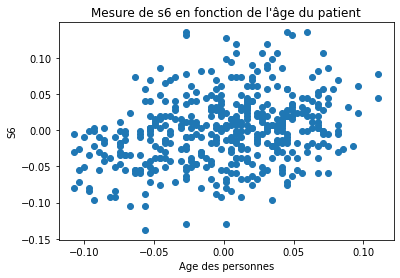

In [7]:
# Sélection des 2 colonnes de données
age, s6= data["age"], data["s6"]
print(age.shape, s6.shape)
# Tracé du nuage de point
plt.scatter(age, s6)
plt.xlabel("Age des personnes")
plt.ylabel("S6")
plt.title("Mesure de s6 en fonction de l'âge du patient")
plt.show()

### Analyse rapide des données :
On remarque qu'il se dégage une tendance dans ce nuage de ponts. Ils semblent s'aligner autour d'une droite de pente proche de 0.5 :
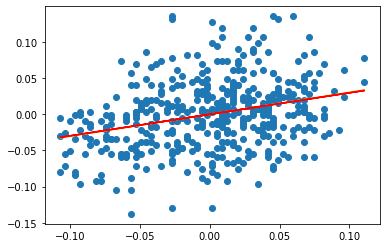



Nous allons mettre en oeuvre un régression linéaire qui nous le confirmera.

In [8]:
# Définition des matrices X, Y et Theta
X = np.stack((age, np.ones(age.shape)), axis=-1) # Ajout d'une colonne de biais aux données
Y = np.array(s6).reshape(s6.shape[0], 1)
Theta = np.random.randn(2, 1)
Theta_init = Theta.copy() # On copie les paramètres initiaux pour comparer ensuite les modèles optimisé et initial

print("X shape : ", X.shape, "  Y shape : ", Y.shape, "Theta shape : ", Theta.shape) # Vérification des tailles de chaque matrice

X shape :  (442, 2)   Y shape :  (442, 1) Theta shape :  (2, 1)


# Définition des fonctions

In [9]:
# Implémenter le calcul  et de son gradient
def grad(X, Y, Theta):
  m = len(Y)
  return  1/m * X.T.dot(X.dot(Theta) - Y)

def cost_function(X, Y, Theta):
  m = len(Y)
  return 1/(2*m) * np.sum((X.dot(Theta) - Y)**2)

# Optimisation des paramètres

In [10]:
n = 1000 # Nombre d'itérations de l'optimisation
lr = 0.01 # Learning rate : Pour régler la vitesse de convergence

history = [] # Cet historique permettra de tracer l'évolution de l'erreur du modèle au cours des itérations

# Apprentissage
for i in range(n):
  Theta -= grad(X, Y, Theta) # Mise à jour des paramètres
  history.append(cost_function(X, Y, Theta)) # Enregistrement des paramètres dans l'historique

param_opti = Theta.copy() # On stocke les paramètres optimisés dans une variable
Y_prediction = X.dot(Theta) # On calcul les points de la droite

# Analyse des résultats :
On vient d'entraîner notre modèle, voyons ce que nous obtenons. On va commencer par afficher l'évolution de l'erreur au cours de l'entraînement, puis nous afficherons les courbes obtenues ainsi que les paramètres calculés.

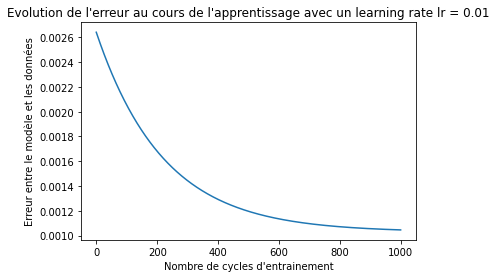

In [12]:
plt.plot(range(len(history)), history)
plt.xlabel("Nombre de cycles d'entrainement")
plt.ylabel("Erreur entre le modèle et les données")
plt.title(f"Evolution de l'erreur au cours de l'apprentissage avec un learning rate lr = {lr}")
plt.show()

On voit que l'erreur converge bien vers un minimum. On peut jouer sur la valeur de $\alpha$ pour ajuster la vitesse de convergence. Il faut cependant faire attention à ne pas utiliser de valeurs trop grandes qui empêcheraient la convergence !

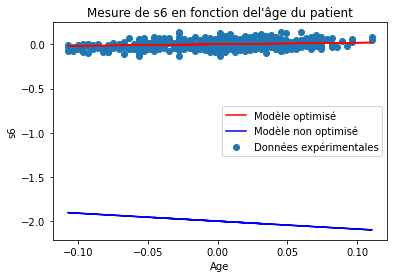


########### Paramètres ###########
Paramètres initiaux : 
 [[-0.89505036]
 [-1.99859576]]
Paramètres optimisés : 
 [[ 1.77469981e-01]
 [-2.75219080e-16]]


In [13]:
# Tracé des données
plt.plot(age,  Y_prediction, "r")
plt.plot(age,  X.dot(Theta_init), "b")
plt.scatter(age,  Y)
# Paramétrage du graphe
plt.title("Mesure de s6 en fonction del'âge du patient")
plt.xlabel("Age")
plt.ylabel("s6")
plt.legend(["Modèle optimisé", "Modèle non optimisé", "Données expérimentales"])
plt.show()
print("\n########### Paramètres ###########")
print("Paramètres initiaux : \n", Theta_init)
print("Paramètres optimisés : \n", param_opti)

On voit bien ici que le modèle initial est totalement à côté de la plaque, mais c'est normal, car à ce stade les paramètres ont été définis aléatoirement. Cependant on remarque qu'après optimisation, le modèle est plutôt fidèle à la réalité et suit bien le nuage de points.

Notez que le nuage semble étiré par rapport aux graphes précédents, cela est du au changement d'échelle : les données ne descendent pas au dessous de -0.2 alors que le modèle initial a une ordonnées à l'origine de -0.8. Pour afficher tous les tracés sur la même figure matplotlib bibliothèque de tracés de graphes) a changé l'échelle.